In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

mega_csv = pd.read_csv("../output_files/MegaDf.csv")

In [2]:
mega_csv

,Unnamed: 0,cityid,Park Score,Health score,City Name,stateabbrev,lat,lon,city_pop2019_y,merchants_all,...,Management occupations_RANK,Office and administrative support occupations_RANK,Personal care and service occupations_RANK,Production occupations_RANK,Protective service occupations_RANK,Sales and related occupations_RANK,Transportation and material moving occupations_RANK,new_case_rate_RANK,overall_SCORE,overall_RANK
0,0,1,4.347368,4.233333,Los Angeles,CA,34.05,-118.24,10039107,-33.30%,...,10.0,8.0,10.0,32.0,8.0,20.0,17.0,29.0,141.5,10.0
1,1,2,4.585000,3.784211,New York City,NY,40.71,-74.01,8336817,-42.00%,...,4.0,6.0,8.0,21.0,9.0,4.0,3.0,51.0,118.0,5.0
2,2,3,4.676471,4.077778,Chicago,IL,41.88,-87.63,5150233,-39.60%,...,20.0,11.0,20.0,24.0,11.0,16.0,49.0,12.5,94.5,1.0
3,3,4,4.529412,4.009091,Houston,TX,29.76,-95.37,4713325,-56.70%,...,17.0,24.0,42.0,7.0,38.5,25.0,47.0,22.0,110.0,4.0
4,4,5,4.425000,4.030769,Phoenix,AZ,33.45,-112.07,4485414,-29.30%,...,33.0,32.0,53.0,33.0,22.0,33.0,9.0,39.5,180.5,24.5
5,5,6,4.457895,3.953846,San Diego,CA,32.72,-117.16,3338330,-36.10%,...,11.0,16.0,9.0,16.5,10.0,29.5,19.0,35.0,159.0,17.0
6,6,7,4.500000,3.375000,Dallas,TX,32.78,-96.80,2635516,-52.50%,...,14.5,29.0,39.5,40.5,25.5,22.5,5.5,19.0,146.0,11.0
7,7,8,4.353333,2.600000,Las Vegas,NV,36.17,-115.14,2266715,-28.40%,...,30.0,45.0,43.0,39.0,23.5,45.0,53.0,15.5,227.5,41.0
8,8,9,4.106667,3.468750,Seattle,WA,47.61,-122.33,2252782,-25.90%,...,9.0,7.0,2.0,1.0,6.0,7.0,1.0,10.0,179.5,23.0
9,9,10,4.444444,4.100000,Fort Worth,TX,32.76,-97.33,2102515,-52.40%,...,14.5,29.0,39.5,40.5,25.5,22.5,5.5,31.5,151.5,14.0


In [3]:
clean_data= mega_csv.drop(columns=["Unnamed: 0"])
clean_data.set_index("cityid")

,Park Score,Health score,City Name,stateabbrev,lat,lon,city_pop2019_y,merchants_all,new_case_rate,bg_posts,...,Management occupations_RANK,Office and administrative support occupations_RANK,Personal care and service occupations_RANK,Production occupations_RANK,Protective service occupations_RANK,Sales and related occupations_RANK,Transportation and material moving occupations_RANK,new_case_rate_RANK,overall_SCORE,overall_RANK
cityid,,,,,,,,,,,,,,,,,,,,,
1,4.347368,4.233333,Los Angeles,CA,34.05,-118.24,10039107,-33.30%,18.60,0.05670,...,10.0,8.0,10.0,32.0,8.0,20.0,17.0,29.0,141.5,10.0
2,4.585000,3.784211,New York City,NY,40.71,-74.01,8336817,-42.00%,49.30,0.15300,...,4.0,6.0,8.0,21.0,9.0,4.0,3.0,51.0,118.0,5.0
3,4.676471,4.077778,Chicago,IL,41.88,-87.63,5150233,-39.60%,11.00,0.06270,...,20.0,11.0,20.0,24.0,11.0,16.0,49.0,12.5,94.5,1.0
4,4.529412,4.009091,Houston,TX,29.76,-95.37,4713325,-56.70%,14.50,0.06590,...,17.0,24.0,42.0,7.0,38.5,25.0,47.0,22.0,110.0,4.0
5,4.425000,4.030769,Phoenix,AZ,33.45,-112.07,4485414,-29.30%,22.10,0.06770,...,33.0,32.0,53.0,33.0,22.0,33.0,9.0,39.5,180.5,24.5
6,4.457895,3.953846,San Diego,CA,32.72,-117.16,3338330,-36.10%,21.80,0.00768,...,11.0,16.0,9.0,16.5,10.0,29.5,19.0,35.0,159.0,17.0
7,4.500000,3.375000,Dallas,TX,32.78,-96.80,2635516,-52.50%,13.70,0.01900,...,14.5,29.0,39.5,40.5,25.5,22.5,5.5,19.0,146.0,11.0
8,4.353333,2.600000,Las Vegas,NV,36.17,-115.14,2266715,-28.40%,12.10,0.01050,...,30.0,45.0,43.0,39.0,23.5,45.0,53.0,15.5,227.5,41.0
9,4.106667,3.468750,Seattle,WA,47.61,-122.33,2252782,-25.90%,9.70,0.13600,...,9.0,7.0,2.0,1.0,6.0,7.0,1.0,10.0,179.5,23.0


In [4]:
clean_data.columns

Index(['cityid', 'Park Score', 'Health score', 'City Name', 'stateabbrev',
       'lat', 'lon', 'city_pop2019_y', 'merchants_all', 'new_case_rate',
       'bg_posts', 'Average Cost of Living ',
       'Architecture and engineering occupations',
       'Arts, design, entertainment, sports, and media occupations',
       'Building and grounds cleaning and maintenance occupations',
       'Business and financial operations occupations',
       'Community and social service occupations',
       'Computer and mathematical occupations',
       'Construction and extraction occupations',
       'Educational instruction and library occupations',
       'Food preparation and serving related occupations',
       'Healthcare practitioners and technical occupations',
       'Healthcare support occupations',
       'Installation, maintenance, and repair occupations',
       'Legal occupations', 'Life, physical, and social science occupations',
       'Management occupations',
       'Office and admi

In [5]:
'''def Weather_Scatter(x_val,y_val):
    colx = x_val
    coly = y_val

    # set up x, y and title for plot
    x=clean_city_data[colx]
    y=clean_city_data[coly]
    plot_title = colname_dic[colx] +" vs. " + colname_dic[coly]

    #plot setup
    plt.scatter(x,y)
    plt.xlabel(colname_dic[colx])
    plt.ylabel(colname_dic[coly])
    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))'''

'def Weather_Scatter(x_val,y_val):\n    colx = x_val\n    coly = y_val\n\n    # set up x, y and title for plot\n    x=clean_city_data[colx]\n    y=clean_city_data[coly]\n    plot_title = colname_dic[colx] +" vs. " + colname_dic[coly]\n\n    #plot setup\n    plt.scatter(x,y)\n    plt.xlabel(colname_dic[colx])\n    plt.ylabel(colname_dic[coly])\n    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))'

In [41]:
#new_df = clean_data[["city_pop2019_y","Average Cost of Living "]]
#new_df.dropna()

In [56]:
def scatter_plot(x_val,y_val):
    x=clean_data[x_val]
    y=clean_data[y_val]
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    mc_fit = slope * x + intercept
    plt.figure(figsize=(15,5))
    plt.scatter(x,y)
    #plt.regplot(x,y)
    plt.plot(x,mc_fit,"r-")
    plt.xticks(rotation =0)
    print(f"r-value is:{rvalue**2}")
    plt.title("No Postive or Negative Correlation has be found in Case Rate vs. Population")
    plt.xlabel("New Case Rate (Covid)")
    plt.ylabel("City Population in (millions)")
    plt.savefig("../Plots and Graphs/City Population vs New Case Rate.png")
    plt.show()
    #plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))


r-value is:0.006223292092060162


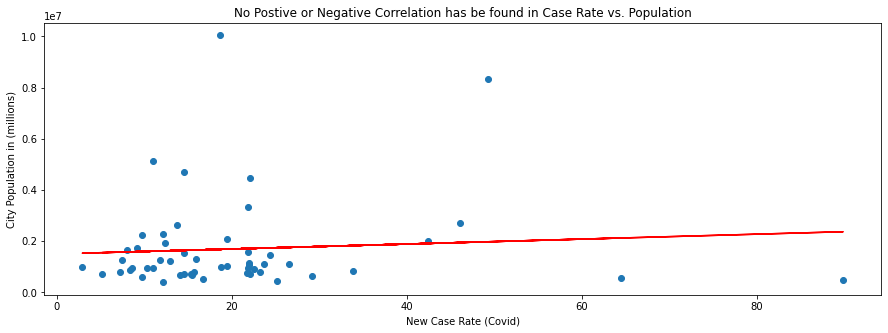

In [57]:
scatter_plot("new_case_rate","city_pop2019_y")

r-value is:0.0015127016120486737


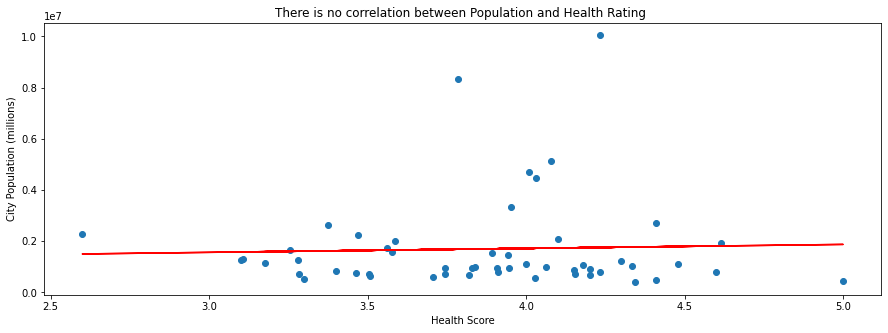

In [33]:
x=clean_data["Health score"]
y=clean_data["city_pop2019_y"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
mc_fit = slope * x + intercept
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.plot(x,mc_fit,"r-")
plt.xticks(rotation =0)
plt.title("There is no correlation between Population and Health Rating ")
plt.xlabel("Health Score")
plt.ylabel("City Population (millions)")
print(f"r-value is:{rvalue**2}")
plt.savefig("../Plots and Graphs/Population vs Health Rating.png")
plt.show()

r-value is:0.0580288062650589


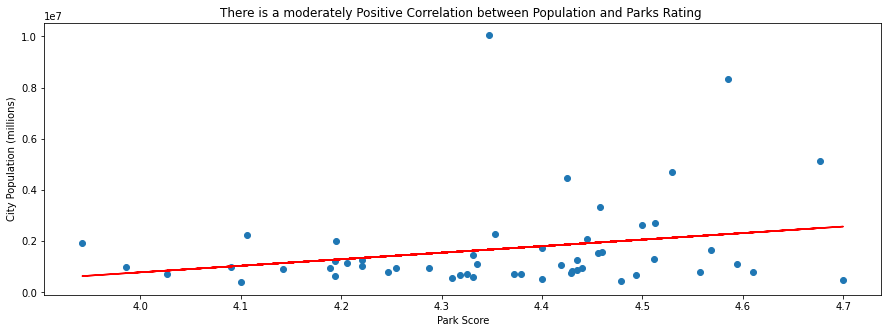

In [30]:
x=clean_data["Park Score"]
y=clean_data["city_pop2019_y"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
mc_fit = slope * x + intercept
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.plot(x,mc_fit,"r-")
plt.xticks(rotation =0)
plt.title("There is a moderately Positive Correlation between Population and Parks Rating ")
plt.xlabel("Park Score")
plt.ylabel("City Population (millions)")
print(f"r-value is:{rvalue**2}")
plt.savefig("../Plots and Graphs/Population vs Park Rating.png")
plt.show()


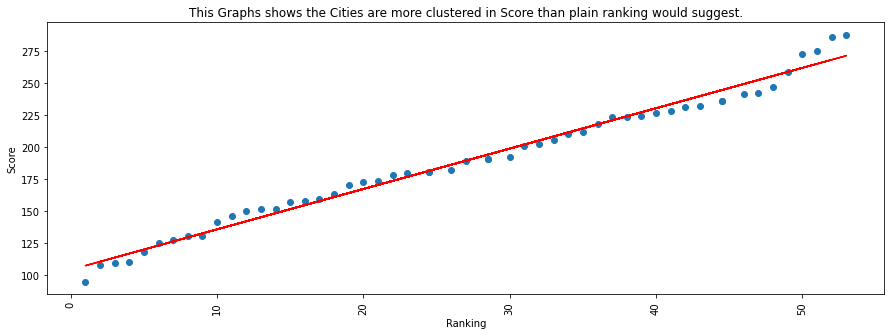

In [31]:
#correlation = st.pearsonr(clean_data["overall_RANK"], clean_data["overall_SCORE"])
x_value = clean_data["overall_RANK"]
y_value = clean_data["overall_SCORE"].astype(float)
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
mc_fit = slope * x_value + intercept
plt.figure(figsize= (15,5))
plt.scatter(x_value,y_value)
plt.plot(x_value,mc_fit,"r-")
plt.xticks(rotation=90)
plt.title("This Graphs shows the Cities are more clustered in Score than plain ranking would suggest.")
plt.xlabel("Ranking")
plt.ylabel("Score")
plt.savefig("../Plots and Graphs/Score vs Ranking.png")

plt.show()

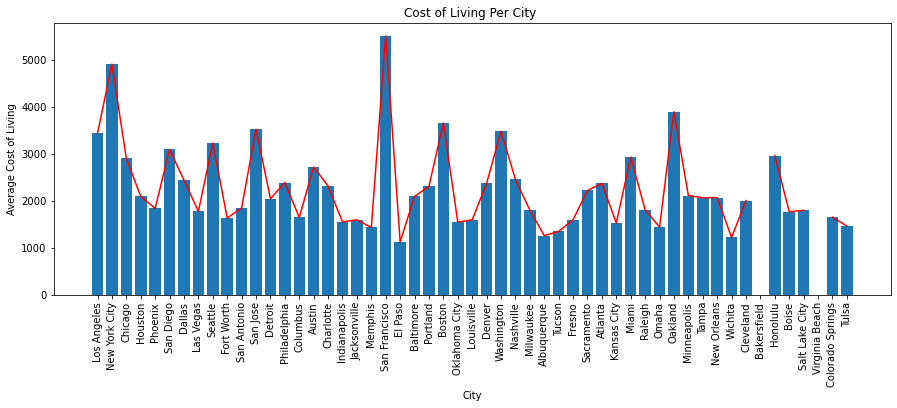

In [45]:
x_value = clean_data["City Name"]
y_value = clean_data["Average Cost of Living "].astype(float)
plt.figure(figsize= (15,5))
plt.bar(x_value,y_value)
plt.plot(x_value,y_value,color="r")
plt.xticks(rotation =90)
plt.title("Cost of Living Per City ")
plt.xlabel("City")
plt.ylabel("Average Cost of Living")
plt.savefig("../Plots and Graphs/Average cost of living vs. City.png")
plt.show()

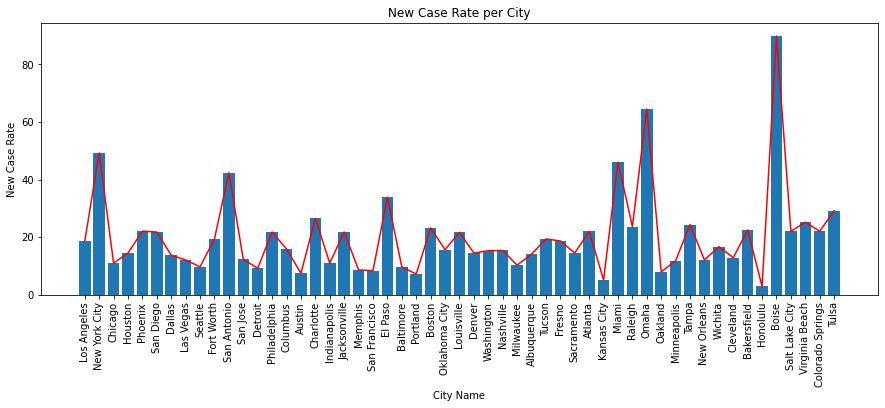

In [59]:
x_value = clean_data["City Name"]
y_value = clean_data["new_case_rate"]
plt.figure(figsize= (15,5))
plt.bar(x_value,y_value)
plt.plot(x_value,y_value,color="r")
plt.xticks(rotation =90)
plt.title("New Case Rate per City")
plt.xlabel("City Name")
plt.ylabel("New Case Rate")
plt.savefig("../Plots and Graphs/New Case Rate vs. City.png")
plt.show()


In [65]:
quartiles = clean_data["city_pop2019_y"].quantile([.25,.5,.75])
# Lower Quartile
lower_q = quartiles[.25]
 # Upper Quartile
upper_q = quartiles[.75]
print(f"The Lower quartiles is: {round(lower_q,2)}\n")
print(f"The Upper quartiles is: {round(upper_q,2)}\n")
    
# Interquartile Range 
iqr = upper_q - lower_q
print(f"The interquartile range is: {round(iqr,2)}\n")
    
# Lower Bound Value
lower_bound = lower_q - (1.5 * iqr)
# Upper Bound Value
upper_bound = upper_q + (1.5 * iqr)
print(f"The Lower Bound is: {round(lower_bound,2)}\n")
print(f"The Upper Bound is: {round(upper_bound,2)}\n")
    
# Ge the Outliners Value
outliers = clean_data.loc[(clean_data["city_pop2019_y"]<lower_bound) | (clean_data["city_pop2019_y"]>upper_bound)]
print(f"Potential Outliers: {outliers}")
print("----------------------------------------------------------------------------------")   

The Lower quartiles is: 766757.0

The Upper quartiles is: 1749343.0

The interquartile range is: 982586.0

The Lower Bound is: -707122.0

The Upper Bound is: 3223222.0

Potential Outliers:    cityid  Park Score  Health score      City Name stateabbrev    lat     lon  \
0       1    4.347368      4.233333    Los Angeles          CA  34.05 -118.24   
1       2    4.585000      3.784211  New York City          NY  40.71  -74.01   
2       3    4.676471      4.077778        Chicago          IL  41.88  -87.63   
3       4    4.529412      4.009091        Houston          TX  29.76  -95.37   
4       5    4.425000      4.030769        Phoenix          AZ  33.45 -112.07   
5       6    4.457895      3.953846      San Diego          CA  32.72 -117.16   

   city_pop2019_y merchants_all  new_case_rate  ...  \
0        10039107       -33.30%           18.6  ...   
1         8336817       -42.00%           49.3  ...   
2         5150233       -39.60%           11.0  ...   
3         4713325      

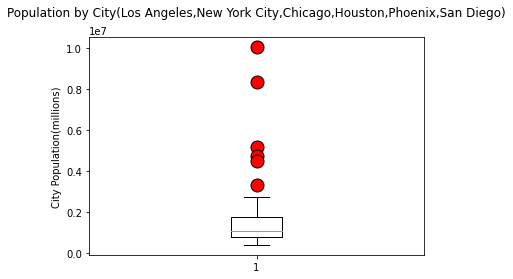

In [66]:
#city = ["Los Angeles","New York City","Chicago","Houston","Phoenix","San Diego"]
fig1, ax1 =plt.subplots()

#Give the outliner customize formatting
outlier = dict(markerfacecolor="r",markersize=13)

# Get the boxplot thorugh subplots
ax1.boxplot(clean_data["city_pop2019_y"],flierprops=outlier)

# Formatting the plot with title and labels
ax1.set_title("Population by City(Los Angeles,New York City,Chicago,Houston,Phoenix,San Diego)\n")

plt.ylabel("City Population(millions)")
plt.savefig("../Plots and Graphs/Population by City with Outlier.png")

#Display the Box Plot
plt.show()

In [22]:
clean_data.dtypes

cityid                                                   int64
Park Score                                             float64
Health score                                           float64
City Name                                               object
stateabbrev                                             object
                                                        ...   
Sales and related occupations_RANK                     float64
Transportation and material moving occupations_RANK    float64
new_case_rate_RANK                                     float64
overall_SCORE                                          float64
overall_RANK                                           float64
Length: 63, dtype: object